<a href="https://colab.research.google.com/github/sunil1206/Data-science-mini-projects/blob/e-comerce/BANK_MARKETING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# 1. ***Data Collection***

## ***1.1 Read the data set***

In [ ]:
df=pd.read_csv("bank-marketing.csv")

## ***1.2 Load the Data Set***

In [ ]:
df

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27092,58,5,Y,unemployed,8000,married,tertiary,married-tertiary,yes,no,183,no,no,cellular,21,nov,167,5,-1,0,unknown,no,0.0
27093,31,3,Y,unemployed,8000,single,tertiary,single-tertiary,no,no,3252,no,no,cellular,21,nov,145,2,-1,0,unknown,no,0.0
27094,34,3,Y,management,100000,divorced,secondary,divorced-secondary,yes,no,124,yes,no,cellular,21,nov,56,1,163,4,other,no,0.0
27095,52,5,Y,technician,60000,married,secondary,married-secondary,yes,no,230,yes,yes,cellular,21,nov,89,4,-1,0,unknown,no,0.0


## ***1.3 Basic Information***

In [ ]:
df.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [ ]:
df.describe().style.set_properties(**{'background-color': 'white',
                           'color': 'green'})

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.645861,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,1.083271,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,1.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,3.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,3.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,4.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,9.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
df.describe(include=object)

,eligible,job,marital,education,marital-education,targeted,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,2,12,3,4,12,2,2,2,2,3,12,4,2
top,Y,blue-collar,married,secondary,married-secondary,yes,no,yes,no,cellular,may,unknown,no
freq,43380,9732,27214,23202,13770,37091,44396,25130,37967,29285,13766,36959,39922


In [ ]:
df.shape

(45211, 23)

In [ ]:
df.columns

Index(['age', 'age group', 'eligible', 'job', 'salary', 'marital', 'education',
       'marital-education', 'targeted', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'response'],
      dtype='object')

In [ ]:
df.dtypes

age                   int64
age group             int64
eligible             object
job                  object
salary                int64
marital              object
education            object
marital-education    object
targeted             object
default              object
balance               int64
housing              object
loan                 object
contact              object
day                   int64
month                object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
y                    object
response              int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [ ]:
df.corr().style.background_gradient(cmap='winter')

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.953304,-0.009025,0.079774,-0.033503,-0.046357,-0.001708,0.006251,0.014944,-0.024598
age group,0.953304,1.000000,0.001850,0.076298,-0.027882,-0.046159,0.000786,0.011064,0.016705,-0.022695
salary,-0.009025,0.001850,1.000000,0.056851,0.036365,-0.013423,0.016959,0.018813,0.023299,0.008884
balance,0.079774,0.076298,0.056851,1.000000,0.002513,0.017179,-0.014055,0.051547,0.029107,0.015971
day,-0.033503,-0.027882,0.036365,0.002513,1.000000,-0.045014,0.199436,0.034247,0.023924,-0.005115
duration,-0.046357,-0.046159,-0.013423,0.017179,-0.045014,1.000000,-0.085706,-0.010725,-0.012824,0.518639
campaign,-0.001708,0.000786,0.016959,-0.014055,0.199436,-0.085706,1.000000,-0.062790,-0.032650,-0.016270
pdays,0.006251,0.011064,0.018813,0.051547,0.034247,-0.010725,-0.062790,1.000000,0.639156,-0.003275
previous,0.014944,0.016705,0.023299,0.029107,0.023924,-0.012824,-0.032650,0.639156,1.000000,-0.003958
response,-0.024598,-0.022695,0.008884,0.015971,-0.005115,0.518639,-0.016270,-0.003275,-0.003958,1.000000


# ***2. Pre Processing***

## ***2.1 Check for Null Values***

In [ ]:
df.isnull().sum()

age                  0
age group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital-education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    1
response             1
dtype: int64

In [ ]:
df[df=='unknown'].count()

age                      0
age group                0
eligible                 0
job                    193
salary                   0
marital                  0
education             1088
marital-education        0
targeted                 0
default                  0
balance                  0
housing                  0
loan                     0
contact              12761
day                      0
month                    0
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             26332
y                        0
response                 0
dtype: int64

In [ ]:
df['duration'] =df['duration'].fillna(df['duration'].median())#filling data with median
df['salary']=df['salary'].replace(0, df['salary'].mean()) #fill salary 0

In [ ]:
for i in ['loan','campaign','contact','pdays','previous','y','response']:#filling data with mode
  df[i] =df[i].fillna(df[i].mode()[0])

In [ ]:
df["education"].value_counts()

secondary    14003
tertiary      7582
primary       4424
unknown       1088
Name: education, dtype: int64

In [ ]:
pd.DataFrame(df.groupby('month')['y'].count())

,y
month,
aug,5215
jul,6380
jun,4486
may,7957
nov,2979
oct,80


In [ ]:
eduRatio = pd.DataFrame([])
for i in df["job"].unique():
    eduRatio = eduRatio.append(df[(df["job"] == i)]["education"].value_counts().to_frame().iloc[0] * 100 / df[(df["job"] == i)]["education"].value_counts().sum())
eduRatio["Job"] = df["job"].unique()
eduRatio

,education,Job
tertiary,81.280788,management
secondary,70.532088,technician
tertiary,45.913219,entrepreneur
secondary,52.751120,blue-collar
unknown,46.113990,unknown
secondary,48.368522,retired
secondary,83.434056,admin.
secondary,82.896282,services
tertiary,47.119342,self-employed
secondary,58.587480,unemployed



## ***2.2 Outlier detection and handling***

Text(0.5, 1.0, 'Box plot of age group')

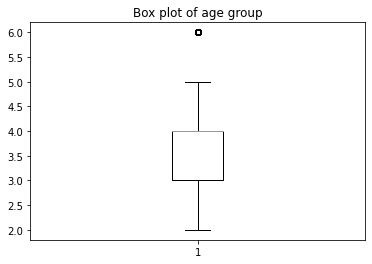

In [ ]:
plt.boxplot(df['age group'])
plt.title('Box plot of age group')

In [ ]:
Q1=np.percentile(df[ 'age group'],25,interpolation='midpoint')
Q2=np.percentile(df[ 'age group'],50,interpolation='midpoint')
Q3=np.percentile(df[ 'age group'],75,interpolation='midpoint')

In [ ]:
print(Q1)
print(Q2)
print(Q3)

3.0
4.0
4.0


In [ ]:
df[ 'age'].median()

40.0

In [ ]:
df[ 'age'].mean()

41.25722404694247

In [ ]:
IQR=Q3-Q1

In [ ]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [ ]:
IQR=Q3-Q1
print(low_lim)
print(up_lim)

outlier=[ ]
for x in df['age group']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)

1.5
5.5


In [ ]:
ind1=df['age group']>up_lim
df.loc[ind1].index

Int64Index([   18,    32,    42,    66,    92,    93,    97,   157,   174,
              199,
            ...
            23720, 23745, 23762, 23770, 23812, 23898, 23979, 23997, 24105,
            24120],
           dtype='int64', length=410)

We cannot drop the outlier,because its affect the dataset

Text(0.5, 1.0, 'Box plot of salary')

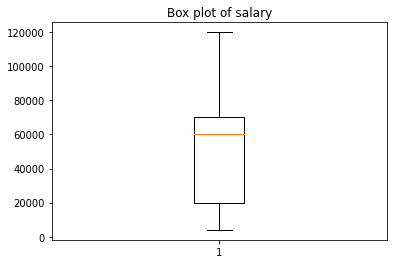

In [ ]:
plt.boxplot(df['salary'])
plt.title('Box plot of salary')

## ***2.3 ENCODING***

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
df1=df.copy()
df1.drop(categorical_data,axis=1)

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
0,58,5,100000.000000,2143,5,261,1,-1,0,0.0
1,44,4,60000.000000,29,5,151,1,-1,0,0.0
2,33,3,120000.000000,2,5,76,1,-1,0,0.0
3,47,4,20000.000000,1506,5,92,1,-1,0,0.0
4,33,3,57668.450382,1,5,198,1,-1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
27092,58,5,8000.000000,183,21,167,5,-1,0,0.0
27093,31,3,8000.000000,3252,21,145,2,-1,0,0.0
27094,34,3,100000.000000,124,21,56,1,163,4,0.0
27095,52,5,60000.000000,230,21,89,4,-1,0,0.0


In [ ]:
categ = ['eligible','targeted','default','housing','loan','y']
le = LabelEncoder()
for i in range(len(categ)):
  df[categ[i]] = le.fit_transform(categorical_data[categ[i]].astype(str))

In [ ]:
df.loc[(df['month']=='jan'),'quater']=1
df.loc[(df['month']=='feb'),'quater']=1
df.loc[(df['month']=='mar'),'quater']=1
df.loc[(df['month']=='apr'),'quater']=2
df.loc[(df['month']=='may'),'quater']=2
df.loc[(df['month']=='jun'),'quater']=2
df.loc[(df['month']=='jul'),'quater']=3
df.loc[(df['month']=='aug'),'quater']=3
df.loc[(df['month']=='sep'),'quater']=3
df.loc[(df['month']=='oct'),'quater']=4
df.loc[(df['month']=='nov'),'quater']=4
df.loc[(df['month']=='dec'),'quater']=4

In [ ]:
df

In [ ]:
du=df['quater']
pd.DataFrame(du)
pd.concat([df,du],axis=1)
df.drop(['month'],axis=1,inplace=True)

ONE HOT ENCODING

Split the Data into features and target

In [ ]:
x = df.drop(['y'],axis=1)
y = df['y']

In [ ]:
one_hot_encoded_data = pd.get_dummies(x, columns = ['contact', 'poutcome','job','marital-education'])

In [ ]:
encoded_data = pd.DataFrame(one_hot_encoded_data)

In [ ]:
encoded_data

,age,age group,eligible,salary,marital,education,targeted,default,balance,housing,loan,day,duration,campaign,pdays,previous,response,quater,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknow,poutcome_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital-education_divorced-primary,marital-education_divorced-secondary,marital-education_divorced-tertiary,marital-education_divorced-unknown,marital-education_married-primary,marital-education_married-secondary,marital-education_married-tertiary,marital-education_married-unknown,marital-education_single-primary,marital-education_single-secondary,marital-education_single-tertiary,marital-education_single-unknown
0,58,5,1,100000.000000,married,tertiary,1,0,2143,1,0,5,261,1,-1,0,0.0,2.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,44,4,1,60000.000000,single,secondary,1,0,29,1,0,5,151,1,-1,0,0.0,2.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,33,3,1,120000.000000,married,secondary,1,0,2,1,1,5,76,1,-1,0,0.0,2.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,47,4,1,20000.000000,married,unknown,0,0,1506,1,0,5,92,1,-1,0,0.0,2.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,33,3,1,57668.450382,single,unknown,0,0,1,0,0,5,198,1,-1,0,0.0,2.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27092,58,5,1,8000.000000,married,tertiary,1,0,183,0,0,21,167,5,-1,0,0.0,4.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
27093,31,3,1,8000.000000,single,tertiary,0,0,3252,0,0,21,145,2,-1,0,0.0,4.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
27094,34,3,1,100000.000000,divorced,secondary,1,0,124,1,0,21,56,1,163,4,0.0,4.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
27095,52,5,1,60000.000000,married,secondary,1,0,230,1,1,21,89,4,-1,0,0.0,4.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## **2.4 Feature Engineering**

In [ ]:
df1.loc[((df1.pdays==1) & (df1.previous==1)),'pdays+previous']=1
df1.loc[((df1.pdays==0) & df1.previous==0),'pdays+previous']=0
df1.loc[((df1.pdays==1) & df1.previous==1),'pdays+previous']=2
df1.loc[((df1.pdays==0) & df1.previous==1),'pdays+previous']=-1

In [ ]:
#based on salary and response catagories data ##########
 
df1.loc[((df1['salary']<57006) & df1['y']==0),'salary+y']=0
df1.loc[((df1['salary']>57006) & df1['y']==1),'salary+y']=1
df1.loc[((df1['salary']<57006) & df1['y']==1),'salary+y']=-1
df1.loc[((df1['salary']>57006) & df1['y']==0),'salary+y']=2

In [ ]:
#catagories data by housing and loan
df1.loc[((df1['housing']==1) & df1['loan']==1),'housing+loan']=1
df1.loc[((df1['housing']==0) & df1['loan']==0),'housing+loan']=0
df1.loc[((df1['housing']==1) & df1['loan']==0),'housing+loan']=1
df1.loc[((df1['housing']==0) & df1['loan']==1),'housing+loan']=-1

In [ ]:
df2=df1[['housing+loan','salary+y' ]]
encoded_data['Overall Expense']=encoded_data['salary']-encoded_data['balance']

In [ ]:
encoded_data=pd.concat([encoded_data,df2],axis=1)


In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,age,age group,eligible,salary,targeted,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,response,quater
age,1.000000,0.953304,-0.247632,-0.001747,0.076398,-0.026793,0.079774,-0.203113,-0.014952,-0.033503,-0.046357,-0.001708,0.006251,0.014944,-0.024591,-0.024591,0.051677
age group,0.953304,1.000000,-0.301438,0.008416,0.065112,-0.026508,0.076298,-0.193278,-0.015987,-0.027882,-0.046159,0.000786,0.011064,0.016705,-0.022689,-0.022689,0.066237
eligible,-0.247632,-0.301438,1.000000,0.009047,-0.009096,0.005704,-0.012772,0.057811,0.004417,0.025301,0.003206,-0.004722,0.020543,0.014308,-0.003376,-0.003376,0.017090
salary,-0.001747,0.008416,0.009047,1.000000,-0.240095,0.003635,0.059379,-0.075701,0.003240,0.032741,-0.015690,0.019662,0.018339,0.022857,0.007555,0.007555,0.157345
targeted,0.076398,0.065112,-0.009096,-0.240095,1.000000,0.004170,-0.035690,0.046926,0.059652,-0.015595,-0.013484,-0.022322,0.005494,0.000930,-0.024850,-0.024850,-0.025526
default,-0.026793,-0.026508,0.005704,0.003635,0.004170,1.000000,-0.076491,-0.019476,0.081184,0.003283,-0.008705,0.005581,-0.014198,-0.001059,0.002424,0.002424,0.005896
balance,0.079774,0.076298,-0.012772,0.059379,-0.035690,-0.076491,1.000000,-0.037927,-0.087670,0.002513,0.017179,-0.014055,0.051547,0.029107,0.015962,0.015962,0.086744
housing,-0.203113,-0.193278,0.057811,-0.075701,0.046926,-0.019476,-0.037927,1.000000,-0.014812,0.009413,0.028785,-0.051476,0.067739,0.036120,-0.016997,-0.016997,-0.235369
loan,-0.014952,-0.015987,0.004417,0.003240,0.059652,0.081184,-0.087670,-0.014812,1.000000,0.001594,-0.001415,-0.011107,0.014404,0.016568,-0.009203,-0.009203,0.070854
day,-0.033503,-0.027882,0.025301,0.032741,-0.015595,0.003283,0.002513,0.009413,0.001594,1.000000,-0.045014,0.199436,0.034247,0.023924,-0.005119,-0.005119,0.159655


In [ ]:
encoded_data.drop(['age','marital','education','quater','response','salary','balance','pdays','previous'],axis=1, inplace=True)

In [ ]:
encoded_data

,age group,eligible,targeted,default,housing,loan,day,duration,campaign,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknow,poutcome_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital-education_divorced-primary,marital-education_divorced-secondary,marital-education_divorced-tertiary,marital-education_divorced-unknown,marital-education_married-primary,marital-education_married-secondary,marital-education_married-tertiary,marital-education_married-unknown,marital-education_single-primary,marital-education_single-secondary,marital-education_single-tertiary,marital-education_single-unknown,Overall Expense,housing+loan,salary+y
0,5,1,1,0,1,0,5,261,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,97857.000000,1.0,1.0
1,4,1,1,0,1,0,5,151,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,59971.000000,1.0,1.0
2,3,1,1,0,1,1,5,76,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,119998.000000,1.0,1.0
3,4,1,0,0,1,0,5,92,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,18494.000000,1.0,2.0
4,3,1,0,0,0,0,5,198,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,57667.450382,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27092,5,1,1,0,0,0,21,167,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,7817.000000,1.0,2.0
27093,3,1,0,0,0,0,21,145,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,4748.000000,1.0,2.0
27094,3,1,1,0,1,0,21,56,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,99876.000000,1.0,1.0
27095,5,1,1,0,1,1,21,89,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,59770.000000,1.0,1.0


## **2.5 Standarization/Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max  = MinMaxScaler(feature_range=(0, 1))
scaled_data = min_max.fit_transform(encoded_data)

scaled_data = pd.DataFrame(scaled_data)

## ***2.6 Feature Reduction***

In [ ]:
pca =PCA(n_components= 0.99)
Reduced_data=pca.fit_transform(scaled_data)
Reduced_data=pd.DataFrame(Reduced_data)

In [ ]:
Reduced_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.039104,-1.232532,-0.334758,-0.367804,-0.883353,0.083435,-0.124542,-0.118274,-0.257946,0.027889,-0.005327,-0.266531,0.035381,0.274277,0.096007,0.045491,-0.105182,0.028294,-0.128581,0.084971,0.156954,-0.065825,0.061202,-0.000990,-0.025735,-0.032558,-0.080252,0.012774,-0.000867
1,-0.347018,-0.896558,0.445591,0.148565,0.522941,0.954345,-0.039357,-0.204240,-0.161532,-0.259374,0.297316,-0.264356,0.065549,0.410805,0.040020,0.044045,0.013817,-0.005096,-0.112978,0.065238,0.137550,-0.060053,0.044028,-0.017461,-0.010976,-0.029906,-0.060735,0.001679,0.004789
2,-0.462383,-0.606854,0.870664,-0.172328,-0.291237,-0.245120,0.359584,0.758976,0.023782,0.090595,0.051737,-0.322770,-0.253922,0.136150,0.042754,-0.311414,0.740254,-0.299676,-0.038559,-0.593476,0.054754,0.055490,0.005309,-0.100671,0.024905,0.023554,0.027708,0.005141,0.009366
3,-1.090463,-0.224151,-0.693864,-0.055593,0.587783,-0.427686,-0.250461,0.041304,-0.157841,-0.163036,-0.573036,-0.174468,-0.192486,0.538206,0.001480,-0.358775,-0.314387,0.050204,-0.018510,0.025052,0.250917,0.650816,-0.003525,-0.036288,-0.031459,0.016710,-0.034375,-0.137796,0.035519
4,-0.058238,-0.763415,-0.283664,0.914369,0.287012,-0.306422,-0.001336,-0.013623,0.120980,-0.040281,-0.278795,-0.245546,-0.251978,0.154513,0.064358,-0.284755,0.012427,0.017845,0.251988,-0.041548,-0.106322,0.224282,-0.015850,-0.033353,0.053869,0.049997,0.048358,1.111010,-0.306958


# 3. Exploratory Data Analysis

## ***3.1 Univariate Analysis***

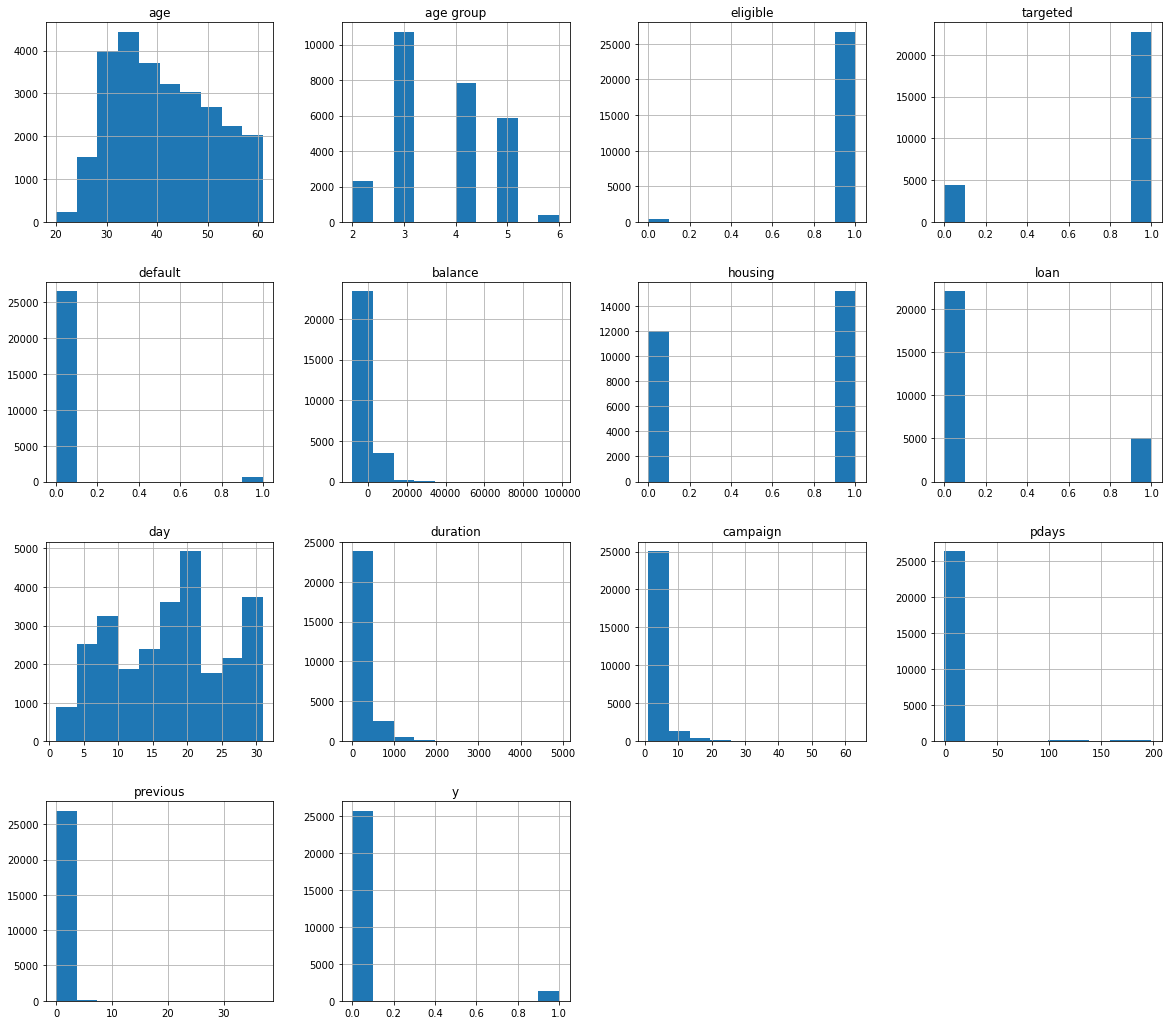

In [ ]:
freqgraph = df.select_dtypes(include = 'int')
freqgraph.hist(figsize= (20, 18))
plt.show()

## ***3.2 Bivariate Analysis***

blue-collar      6252
management       5684
technician       4924
admin.           2813
services         2555
retired          1042
entrepreneur      991
self-employed     972
housemaid         878
unemployed        623
unknown           193
student           170
Name: job, dtype: int64


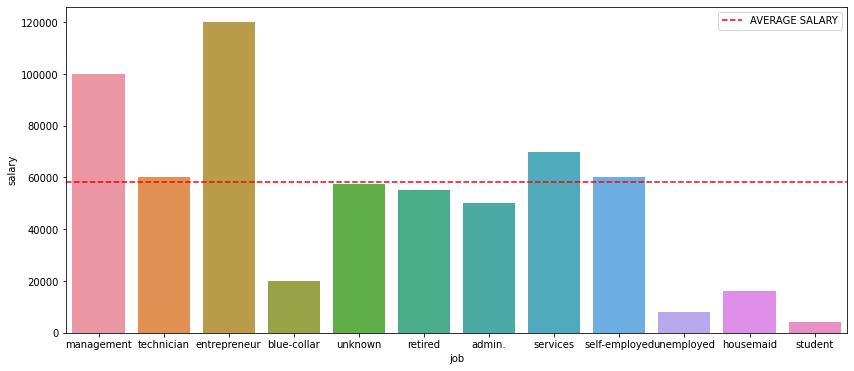

58079.19736220694


In [ ]:
print(df["job"].value_counts())
plt.figure(figsize=(14,6))
plt.axhline(df['salary'].mean(), color = 'r', linestyle = '--', label='AVERAGE SALARY')
sns.barplot(x='job', y='salary', data=df)
plt.legend()
plt.show()
print(df['salary'].mean())

In [ ]:
def display_pct(df,xVar,ax):
  numX=len([x for x in df[xVar].unique() if x==x])
  bars = ax.patches
  for ind in range(numX):
    hueBars=bars[ind:][::numX]
    total = sum([x.get_height() for x in hueBars])
    for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

3    10716
4     7823
5     5846
2     2302
6      410
Name: age group, dtype: int64


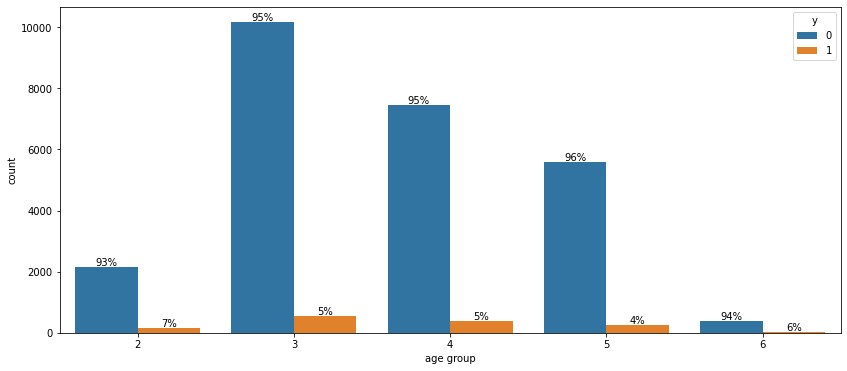

In [ ]:
plt.figure(figsize=(14,6))
ax=sns.countplot(data=df,x='age group',hue='y')
bars = ax.patches
display_pct(df=df1,xVar='age group',ax=ax)
print(df['age group'].value_counts())

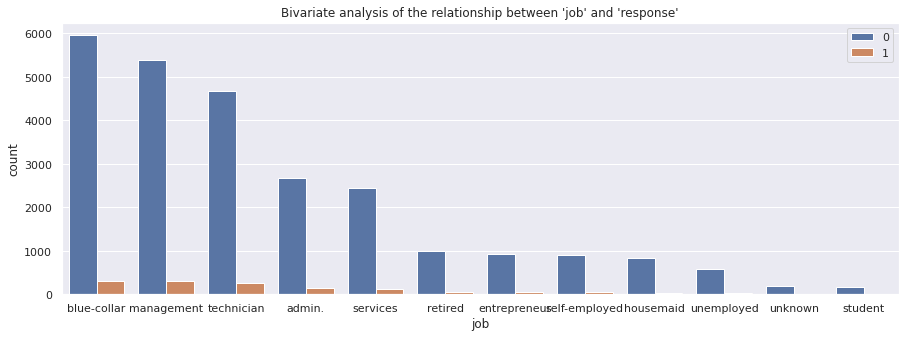

In [ ]:
#bi variant chart based on y
%matplotlib inline
plt.figure(figsize=(15,5))
sns.set_theme(style='darkgrid')
sns.countplot(x='job', data=df,hue = "y", order = df["job"].value_counts().index)
plt.title("Bivariate analysis of the relationship between 'job' and 'response'")
plt.legend()
plt.show()


20000.000000     9732
100000.000000    9458
60000.000000     9176
50000.000000     5171
70000.000000     4154
55000.000000     2264
120000.000000    1487
8000.000000      1303
16000.000000     1240
4000.000000       938
57006.171065      288
Name: salary, dtype: int64


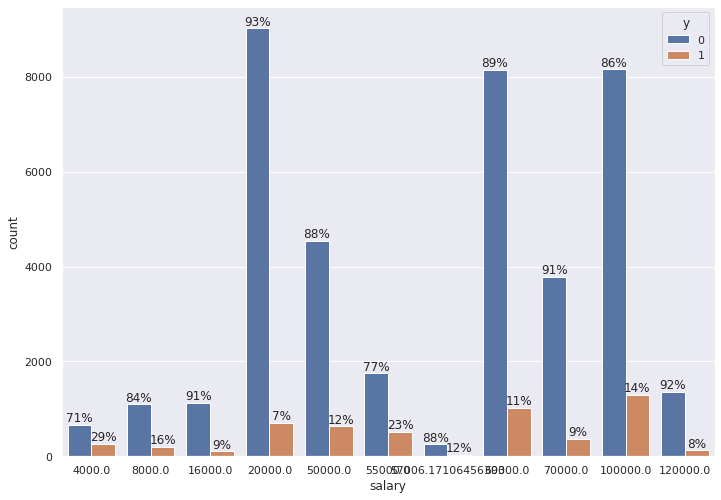

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
ax=sns.countplot(data=df,x='salary',hue='y')
bars = ax.patches
display_pct(df=df1,xVar='salary',ax=ax)
print(df['salary'].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


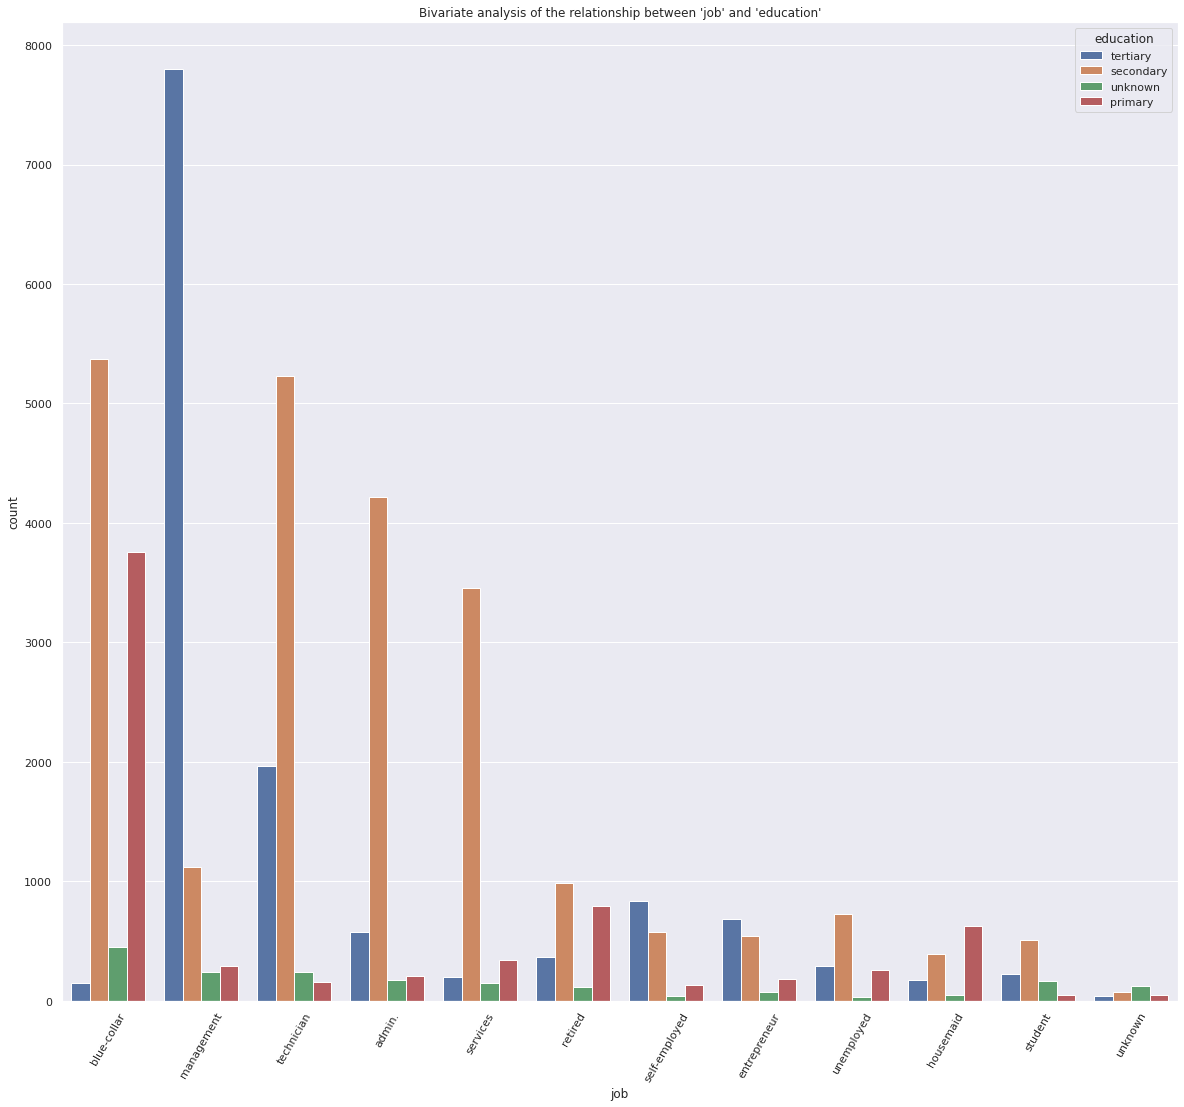

In [ ]:
job_status = df["job"]
print(job_status.value_counts())
education_status = df["education"]
print(education_status.value_counts())

sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(20, 18)})
job = sns.countplot(x="job", data = df, hue = "education", order = df["job"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'job' and 'education'")
plt.show()

In [ ]:


loan_status = df["day"]
print(loan_status.value_counts())

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64


In [ ]:
loan_status = df["salary"]
print(loan_status.value_counts())

20000.000000     6252
60000.000000     5896
100000.000000    5684
50000.000000     2813
70000.000000     2555
55000.000000     1042
120000.000000     991
16000.000000      878
8000.000000       623
57668.450382      193
4000.000000       170
Name: salary, dtype: int64


In [ ]:
loan_status = df["balance"]
print(loan_status.value_counts())

0       2426
1        134
2        101
4         91
3         89
        ... 
6150       1
3039       1
2052       1
6134       1
6171       1
Name: balance, Length: 6044, dtype: int64


In [ ]:
housing_status = df["housing"]
print(housing_status.value_counts())

1    15132
0    11965
Name: housing, dtype: int64


In [ ]:
loan_status = df["loan"]
print(loan_status.value_counts())

0    22028
1     5069
Name: loan, dtype: int64


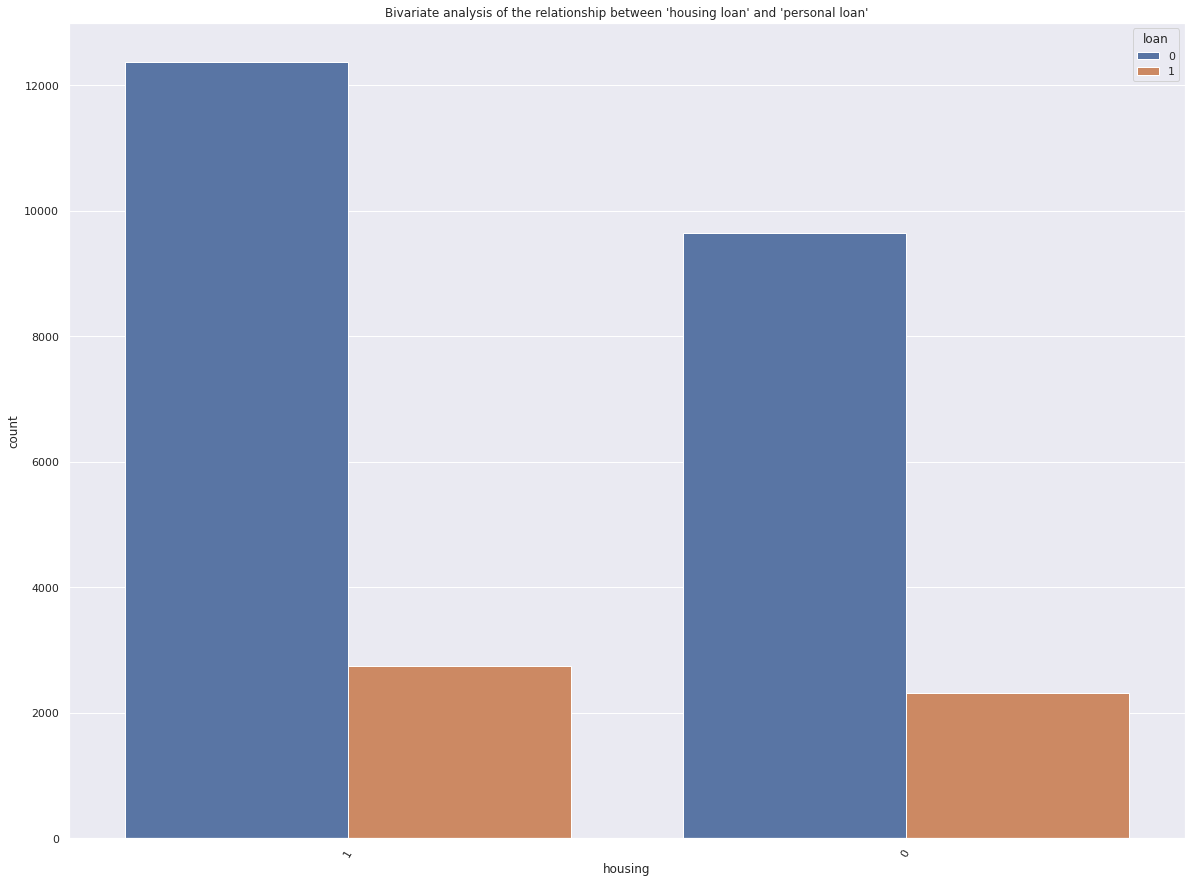

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(20, 15)})
job = sns.countplot(x="housing", data = df, hue = "loan", order = df["housing"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'housing loan' and 'personal loan'")
plt.show()

# 4. Modelling

In [ ]:
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.500,1.0,1.0,0.0,1.0,0.0,0.133333,0.053070,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.856432,0.0,0.0
1,0.375,1.0,1.0,0.0,1.0,0.0,0.133333,0.030704,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.631902,0.0,0.0
2,0.250,1.0,1.0,0.0,1.0,1.0,0.133333,0.015453,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.987649,0.0,0.0
3,0.375,1.0,0.0,0.0,1.0,0.0,0.133333,0.018707,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.386091,0.0,1.0
4,0.250,1.0,0.0,0.0,0.0,0.0,0.133333,0.040260,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.614325,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.500,1.0,1.0,0.0,0.0,0.0,0.533333,0.198658,0.032258,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.627185,0.0,0.0
45207,0.750,0.0,1.0,0.0,0.0,0.0,0.533333,0.092721,0.016129,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.592195,0.0,1.0
45208,0.750,0.0,1.0,0.0,0.0,0.0,0.533333,0.229158,0.064516,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.568572,0.0,1.0
45209,0.500,1.0,1.0,0.0,0.0,0.0,0.533333,0.103294,0.048387,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.391057,0.0,1.0


Split the data into test and train

In [ ]:
X=Reduced_data
Y=y

x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# Logistic Regression Model 1

logreg = LogisticRegression(solver='liblinear')
model= logreg.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#vallidation on holdout sets
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#cross validation

y_test_pred=model.fit(x_train,y_train).predict(x_test)
y_train_pred=model.fit(x_test,y_test).predict(x_train)

#evaluate

accuracy_score(y_train,y_train_pred)*100 , accuracy_score(y_test,y_test_pred)*100

(89.89161689891617, 89.95134178708346)

In [ ]:
#cross val score

from sklearn.model_selection import cross_val_score
#create 10 folds

score= cross_val_score(model,scaled_data,y,cv=10)

In [ ]:
#take an average of this score
score.mean()

0.8889650743823531

In [ ]:
#Random forest 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [ ]:
#evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7725
           1       0.14      0.02      0.03       405

    accuracy                           0.95      8130
   macro avg       0.55      0.51      0.50      8130
weighted avg       0.91      0.95      0.93      8130



In [ ]:
# Define the list classifiers
# Instantiate lr
lr = LogisticRegression(random_state=42)

# Instantiate knn
knn = KNN(n_neighbors=10)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=42)

#instantiate rf
rf = RandomForestClassifier(max_depth=2)


classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt),('RandomForestClassifier', rf)]

from sklearn.metrics import accuracy_score
for clf_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)

    accuracy=accuracy_score(y_test,y_pred)

    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.950
K Nearest Neighbours : 0.950
Classification Tree : 0.950
RandomForestClassifier : 0.950


# ***5. Model Fine Tuning***

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X, Y)

print_results(cv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


BEST PARAMS: {'C': 0.001}

0.95 (+/-0.0) for {'C': 0.001}
0.95 (+/-0.0) for {'C': 0.01}
0.95 (+/-0.0) for {'C': 0.1}
0.95 (+/-0.0) for {'C': 1}
0.946 (+/-0.017) for {'C': 10}
0.95 (+/-0.0) for {'C': 100}
0.95 (+/-0.0) for {'C': 1000}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
cv.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Conclusion**

Customers with an account balance of more than 1490 dollars are more likely to sign up for a term deposit, so targeting them would be a best option in future.Customers between 30 to 50 should be the focus of future campaigns. 

The best fit model obtained by analysing this data is Logistic Regression.

# **TEAM -9**

**TEAM MEMBERS**

ABHIJITH PRAKASH P
SUNIL M A
SOUMYA B
PP AMBILI